In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

In [2]:
data1=pd.read_csv("lvg_table1_n.csv",delimiter=",",header=None)

In [3]:
data1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,AGC102728,0,0,21.4,31,1,19,0.20,0.58,0.17,...,20.2,NaN,17.7* 18.70,21.0,10,Ir,L,566.0,10.52,BTF
1,UGC12894,0,0,22.5,39,29,44,1.02,0.87,0.47,...,16.8,19.4,14.0* 15.70,34.0,10,Ir,L,335.0,8.47,TF
2,PGC000083,0,1,6.5,32,22,41,0.74,0.29,0.19,...,17.7,NaN,15.2* 17.00,32.0,10,Ir,L,542.0,9.29,BTF
3,WLM,0,1,58.1,-15,27,40,11.48,0.35,0.16,...,11.0,15.6,9.0 11.20,53.0,9,Im,N,-122.0,0.98,TRGB
4,And XVIII,0,2,14.5,45,5,20,1.60,0.97,0.45,...,17.3,>24.60,12.8* >14.80,23.0,-3,Sph,L,-332.0,1.31,TRGB
5,PAndAS-03,0,3,56.4,40,53,19,0.40,0.97,0.37,...,21.3,>24.10,16.8*,NaN,-3,dE,L,NaN,0.78,mem
6,PAndAS-04,0,4,42.9,47,21,42,0.18,0.95,0.57,...,18.4,>25.60,13.8*,NaN,-3,dE,H,-397.0,0.78,mem
7,PAndAS-05,0,5,24.1,43,55,35,0.23,0.90,0.33,...,20.3,>24.60,15.9*,NaN,-3,dE,N,-183.0,0.78,mem
8,ESO409-015,0,5,31.8,-28,5,53,1.20,0.46,0.07,...,15.2,17.2,12.7* 15.30,53.0,9,Im,N,726.0,8.71,TRGB
9,AGC748778,0,6,34.4,15,30,39,0.32,0.52,0.28,...,18.9,24.5,16.3* 18.20,16.0,10,Ir,L,258.0,6.22,TRGB


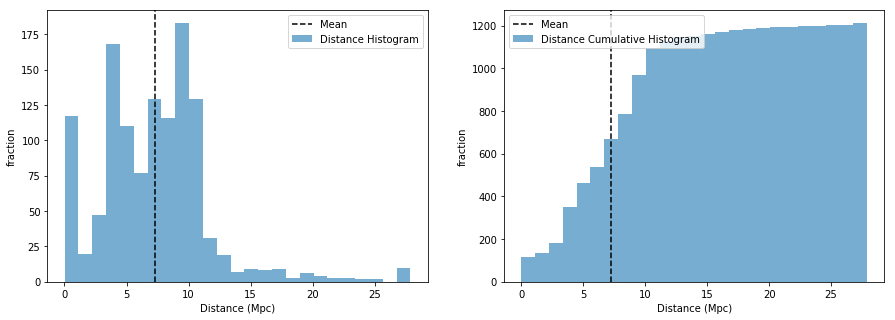

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data1[19],bins=25,alpha=0.6,density=False,label="Distance Histogram")
plt.axvline(x=data1[19].mean(),label="Mean",color="k",linestyle="--")
plt.xlabel("Distance (Mpc)")
plt.ylabel("fraction")
plt.legend()
plt.subplot(1,2,2)
plt.hist(data1[19],bins=25,alpha=0.6,cumulative=True,label="Distance Cumulative Histogram")
plt.axvline(x=data1[19].mean(),label="Mean",color="k",linestyle="--")
plt.xlabel("Distance (Mpc)")
plt.ylabel("fraction")
plt.legend()

plt.show()

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


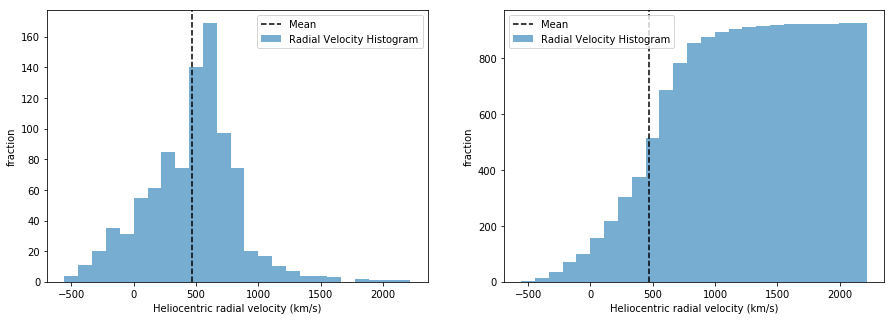

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data1[18],bins=25,alpha=0.6,density=False,label="Radial Velocity Histogram")
plt.axvline(x=data1[18].mean(),label="Mean",color="k",linestyle="--")
plt.xlabel("Heliocentric radial velocity (km/s)")
plt.ylabel("fraction")
plt.legend()
plt.subplot(1,2,2)
plt.hist(data1[18],bins=25,alpha=0.6,cumulative=True,label="Radial Velocity Histogram")
plt.axvline(x=data1[18].mean(),label="Mean",color="k",linestyle="--")
plt.xlabel("Heliocentric radial velocity (km/s)")
plt.ylabel("fraction")
plt.legend()

plt.show()

In [6]:
data1["RA"]=data1[1]/0.0667+data1[2]/60+data1[3]/60
data1["DEC"]=(data1[4])+data1[5]*0.0166667*np.sign(data1[4])+data1[6]*0.000277778*np.sign(data1[4])

In [7]:
data1["RA"].min(), data1["RA"].max(), data1["DEC"].min(), data1["DEC"].max()

(0.125, 346.7209195402299, -85.145555832, 81.624167906)

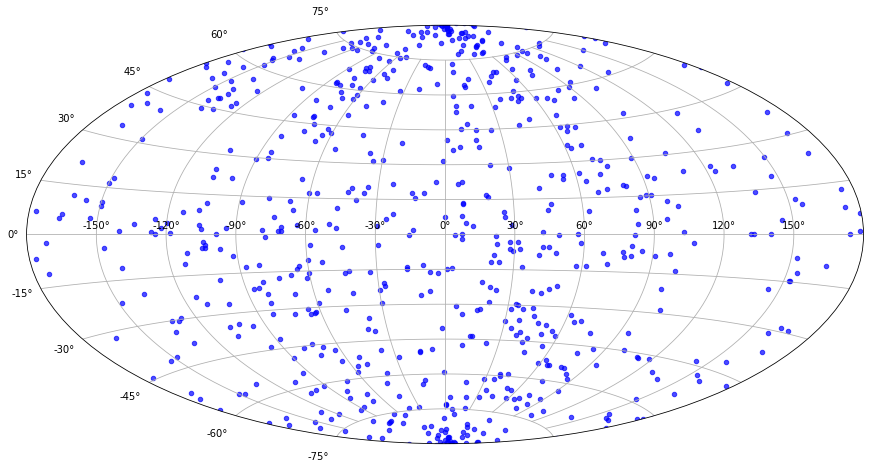

In [8]:
fig = plt.figure(figsize=(15,12))
#'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear'
ax = fig.add_subplot(1,1,1, projection='aitoff')
ax.scatter(data1["RA"], data1["DEC"], s=20, color='b', alpha=0.7)
ax.grid()

In [9]:
from itertools import combinations 
  
def findPairs(lst, K):    
    res = [] 
    for var in combinations(lst, 2): 
        if var[0] + var[1] == K: 
            res.append((var[0], var[1])) 
          
    return res 

In [10]:
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#if "setup_text_plots" not in globals():
#    from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
#@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=30, Nbootstraps=10,  method='landy-szalay', rseed=21):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1 / 100.), np.log10(10), 30)

    results = [bins]
    #for D in [data_red, data_blue]:
    results += bootstrap_two_point_angular(data1['RA'],data1['DEC'],bins=bins,method=method,
                                           Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])



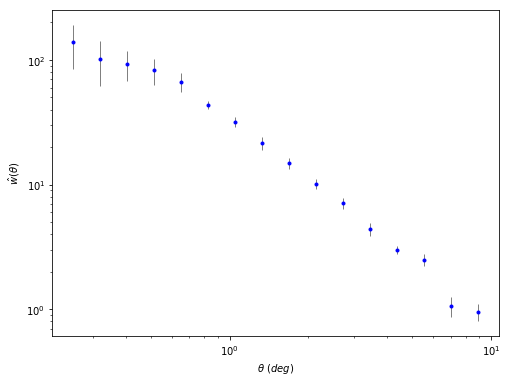

In [11]:
plt.figure(figsize=(8,6))
plt.errorbar(bin_centers, r_corr, r_corr_err,fmt='.b', ecolor='gray', lw=1)
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r'$\theta\ (deg)$')
plt.ylabel(r'$\hat{w}(\theta)$')
plt.show()